## Data Mining 

#### Exercise 8 Text Mining 

### 7.1 Which documents are similar

##### 1. The file documents.zip is provided in ILIAS and contains three corpora. Load and vectorize the 4-documents corpus using load_files function. How many different attributes has the generated example set?

In [304]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

corpus_4_docs = load_files('DataSetEx7', categories=['corpus-4docs'], encoding='utf-8')

vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(corpus_4_docs.data)

df = pd.DataFrame(count_matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(df)

,000,10,100,15,1881,19,1960s,2008,25,26,...,yeah,years,yet,yohan,yorkshire,youth,zagreb,zlatan,zone,ángel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,1,0,0,1,0,...,1,2,1,0,0,1,1,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


##### 2. Examine the generated word list. What are the most common words? Look for the three most common words that might be helpful for text mining tasks?


In [305]:
import pandas as pd

def generate_word_list(X, Y, feature_names, target_names):
    d = pd.DataFrame(X.toarray(), columns=feature_names)
    doc = d[ d>0 ].count()
    d = d.assign(target=Y)
    d = d.groupby(by='target').sum()
    d = d.transpose()
    d.columns = target_names
    total = d.sum(axis=1)
    d = d.assign(total_occurrences=total)
    d = d.assign(document_occurrences=doc)
    d = d.sort_values(by='total_occurrences', ascending=False)
    return d

In [306]:
def generate_word_list(X, Y, feature_names, target_names):
    d = pd.DataFrame(X.toarray(), columns=feature_names)
    doc = d[ d>0 ].count()
    d = d.assign(target=Y)
    d = d.groupby(by='target').sum()
    d = d.transpose()
    d.columns = target_names
    total = d.sum(axis=1)
    d = d.assign(total_occurrences=total)
    d = d.assign(document_occurrences=doc)
    d = d.sort_values(by='total_occurrences', ascending=False)
    return d

word_list = generate_word_list(count_matrix, corpus_4_docs.target, vectorizer.get_feature_names_out(), corpus_4_docs.target_names)
display(word_list)

,corpus-4docs,total_occurrences,document_occurrences
the,151,151,4
of,68,68,4
and,61,61,4
in,60,60,4
to,60,60,4
...,...,...,...
heavily,1,1,1
hebden,1,1,1
held,1,1,1
help,1,1,1


##### 3. Remove stopwords and apply the porter stemmer. By how many attributes do the operators reduce the size of your example set?

In [307]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re, string

stemmer = PorterStemmer()
token_pattern = re.compile(r"(?u)\b\w\w+\b")
my_stopwords = set(stopwords.words('english'))

def tokenize(text):
    stems = []
    tokens = token_pattern.findall(text)
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudhirjoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [285]:
# Removing the stopwords 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(df_4.data)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(features)

,000,10,100,15,1881,19,1960s,2008,25,26,...,write,yeah,years,yohan,yorkshire,youth,zagreb,zlatan,zone,ángel
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036914,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.036914,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.035117,0.000000,0.000000,0.000000,0.035117,0.035117,0.000000,0.000000,0.035117,0.000000,...,0.000000,0.035117,0.070234,0.000000,0.000000,0.035117,0.035117,0.035117,0.000000,0.000000
2,0.000000,0.054054,0.000000,0.054054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.054054,0.000000,0.000000,0.000000,0.000000,0.054054,0.054054
3,0.000000,0.000000,0.060133,0.000000,0.000000,0.000000,0.000000,0.060133,0.000000,0.060133,...,0.060133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [299]:
from sklearn.metrics.pairwise import cosine_similarity
import os

vectorizer = TfidfVectorizer(tokenizer=tokenize)
vectors = vectorizer.fit_transform(corpus_4_docs.data)

names = [ "[{}] {}".format(i, os.path.basename(f)) for i, f in enumerate(corpus_4_docs.filenames) ]
sim = pd.DataFrame(cosine_similarity(vectors), columns=names, index=names)
display(sim)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudhirjoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,000,10,100,15,1881,19,1960,2008,25,26,...,yeah,year,yet,yohan,yorkshir,youth,zagreb,zlatan,zone,ángel
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03411,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.026893,0.000000,0.03411,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.032649,0.000000,0.000000,0.000000,0.032649,0.032649,0.00000,0.000000,0.032649,0.000000,...,0.032649,0.065299,0.025741,0.000000,0.00000,0.032649,0.032649,0.032649,0.000000,0.000000
2,0.000000,0.051931,0.000000,0.051931,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.051931,0.00000,0.000000,0.000000,0.000000,0.051931,0.051931
3,0.000000,0.000000,0.060443,0.000000,0.000000,0.000000,0.00000,0.060443,0.000000,0.060443,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [308]:
print(corpus_4_docs.data[1][:500])
print('\n==================\n')
print(corpus_4_docs.data[2][:500])

Málaga vs. Real Madrid Barcelona vs. Sevilla 

It cannot often be said that Barcelona and Madrid are the warm-up act. But from the perspective of world television this weekend, the mighty Spanish teams will have to go some to come close to the shootout Sunday between the Manchester clubs in England. 
Barça is still, game on game, playing the most beautiful soccer on earth. And Sevilla is one of the opponents that might dare to attack it in Camp Nou. 
Real, however, has the more intriguing ch


Real Madrid Slips Into First With a Hat Trick by Ronaldo


Barcelona was held to a scoreless tie by visiting Sevilla on Saturday, letting Real Madrid take the overnight lead in the Spanish league when Cristiano Ronaldo scored three goals in 15 first-half minutes in a 4-0 rout at Malaga. 
The Times's soccer blog has the world's game covered from all angles.
Go to the Goal Blog 
Barcelona looked set to snatch a victory in injury time when Andrés Iniesta was fouled in the penalty area, but Se


##### 4. Compute the cosine similarity between the documents with the cosine_similarity function. Which documents are most similar? Can you confirm the judgment of the algorithm by reading the documents?

In [287]:
from sklearn.metrics.pairwise import cosine_similarity
import os
names = ["[{}] {}".format(i, os.path.basename(f)) for i, f in enumerate(df_4.filenames)]
sim = pd.DataFrame(cosine_similarity(matrix), columns= names,index = names)
display(sim)

,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.071657,0.036113,0.054501
[1] doc4.txt,0.071657,1.000000,0.218427,0.037516
[2] doc2.txt,0.036113,0.218427,1.000000,0.023157
[3] doc1.txt,0.054501,0.037516,0.023157,1.000000


Documnent 1 and 2 are the most similar documents with cosine_similarity score of 0.218

##### 5. Experiment with different similarity metrics as well as with different vector creation methods. Which combination produces the best similarity scores?

In [309]:
from sklearn.metrics.pairwise import *
from sklearn.feature_extraction.text import *

# create different vectorizers
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize)
tf_vectorizer = TfidfVectorizer(use_idf=False, tokenizer=tokenize)
to_vectorizer = CountVectorizer(tokenizer=tokenize)
bto_vectorizer = CountVectorizer(binary=True, tokenizer=tokenize)

# calcualte the features
binary_features = bto_vectorizer.fit_transform(corpus_4_docs.data).astype(bool)
term_occurrence_features = to_vectorizer.fit_transform(corpus_4_docs.data)
term_frequency_features = tf_vectorizer.fit_transform(corpus_4_docs.data)
tfidf_features = tfidf_vectorizer.fit_transform(corpus_4_docs.data)
features = [ 
    ('binary term occurrences', binary_features.toarray()),
    ('term occurrences', term_occurrence_features.toarray()),
    ('term frequencies', term_frequency_features.toarray()),
    ('TF-IDF', tfidf_features.toarray())
           ]

# similarity/distance functions
sim = [ ('Euclidean Distance', euclidean_distances), ('Cosine Similarity', cosine_similarity) ]

print("Jaccard distance (binary term occurrences):")
distance = pairwise_distances(binary_features.toarray(), metric='jaccard')
df = pd.DataFrame(distance, columns=names, index=names)
display(df)

for sim_name, sim_func in sim:
    for feature_name, feature in features:
        print("{} ({}):".format(sim_name, feature_name))
        distance = sim_func(feature)
        df = pd.DataFrame(distance, columns=names, index=names)
        display(df)

Jaccard distance (binary term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,0.921191,0.950617,0.943114
[1] doc4.txt,0.921191,0.000000,0.901544,0.960251
[2] doc2.txt,0.950617,0.901544,0.000000,0.962712
[3] doc1.txt,0.943114,0.960251,0.962712,0.000000


Euclidean Distance (binary term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,22.934690,19.621417,17.748239
[1] doc4.txt,22.934690,0.000000,21.610183,21.424285
[2] doc2.txt,19.621417,21.610183,0.000000,16.852300
[3] doc1.txt,17.748239,21.424285,16.852300,0.000000


Euclidean Distance (term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,44.474712,38.275318,36.193922
[1] doc4.txt,44.474712,0.000000,34.044089,37.255872
[2] doc2.txt,38.275318,34.044089,0.000000,27.766887
[3] doc1.txt,36.193922,37.255872,27.766887,0.000000


Euclidean Distance (term frequencies):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,1.336691,1.369094,1.354813
[1] doc4.txt,1.336691,0.000000,1.176883,1.369536
[2] doc2.txt,1.369094,1.176883,0.000000,1.383504
[3] doc1.txt,1.354813,1.369536,1.383504,0.000000


Euclidean Distance (TF-IDF):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,1.362603,1.388443,1.375136
[1] doc4.txt,1.362603,0.000000,1.250259,1.387432
[2] doc2.txt,1.388443,1.250259,0.000000,1.397743
[3] doc1.txt,1.375136,1.387432,1.397743,0.000000


Cosine Similarity (binary term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.150267,0.094698,0.114342
[1] doc4.txt,0.150267,1.000000,0.190304,0.090109
[2] doc2.txt,0.094698,0.190304,1.000000,0.073972
[3] doc1.txt,0.114342,0.090109,0.073972,1.000000


Cosine Similarity (term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.106629,0.062791,0.082241
[1] doc4.txt,0.106629,1.000000,0.307473,0.062185
[2] doc2.txt,0.062791,0.307473,1.000000,0.042958
[3] doc1.txt,0.082241,0.062185,0.042958,1.000000


Cosine Similarity (term frequencies):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.106629,0.062791,0.082241
[1] doc4.txt,0.106629,1.000000,0.307473,0.062185
[2] doc2.txt,0.062791,0.307473,1.000000,0.042958
[3] doc1.txt,0.082241,0.062185,0.042958,1.000000


Cosine Similarity (TF-IDF):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.071657,0.036113,0.054501
[1] doc4.txt,0.071657,1.000000,0.218427,0.037516
[2] doc2.txt,0.036113,0.218427,1.000000,0.023157
[3] doc1.txt,0.054501,0.037516,0.023157,1.000000


### 7.2 Cluster the 30-Documents Corpus

##### 1. The 30-documents corpus contains postings from three news groups. Vectorize the 30-documents corpus, remove stopwords and stem the corpus.

In [310]:
corpus_30_docs = load_files('DataSetEx7/corpus-30docs',encoding='utf-8')

vectorizer_30_docs = TfidfVectorizer(tokenizer=tokenize)
tfidf_matrix_30_docs = vectorizer_30_docs.fit_transform(corpus_30_docs.data)

##### 2. Use K-Means to cluster the corpus. Print the ground truth and the prediction. Compute the adjusted Rand index.

In [311]:
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(tfidf_matrix_30_docs)

names = [ "[{}] {}".format(i, os.path.basename(f)) for i, f in enumerate(corpus_30_docs.filenames) ]
df = pd.DataFrame()
df = df.assign(category=corpus_30_docs.target)
df = df.assign(cluster=cluster_ids)
df.index = names

groups = df.groupby(by=['category', 'cluster']).size()
display(groups)

category  cluster
0         1           6
          2           4
1         0          10
2         1          10
dtype: int64

##### 3. Examine the distribution of frequent words over the three different classes in the word list. Does the distribution give you an idea how you could improve the clustering using any of the prune methods (max_df, min_df)?

In [312]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(tokenizer=tokenize)
count_matrix = count_vectorizer.fit_transform(corpus_30_docs.data)

word_list = generate_word_list(count_matrix, corpus_30_docs.target, count_vectorizer.get_feature_names_out(), corpus_30_docs.target_names)
display(word_list.sort_values(by='document_occurrences', ascending=False))

,sci.space,soc.religion.christian,talk.politics.guns,total_occurrences,document_occurrences
edu,85,99,97,281,30
apr,10,24,10,44,30
cs,37,19,40,96,30
id,10,10,11,31,30
messag,10,12,10,32,30
...,...,...,...,...,...
waco,0,0,1,1,1
walker,0,1,0,1,1
wam,0,0,1,1,1
wanna,0,0,1,1,1


The words appearing more often are almost in all documents (between 20 and 30 document occurrences). Words that are significant for some documents appear less than 10 times within the documents. This is a hint to use e.g. absolute pruning. Using the ranges above 10 and below 4

In [313]:
vectorizer_30_docs = TfidfVectorizer(tokenizer=tokenize, max_df=10, min_df=4)
tfidf_matrix_30_docs = vectorizer_30_docs.fit_transform(corpus_30_docs.data)

estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(tfidf_matrix_30_docs)

df = pd.DataFrame()
df = df.assign(category=corpus_30_docs.target)
df = df.assign(cluster=cluster_ids)
df.index = names

groups = df.groupby(by=['category', 'cluster']).size()
display(groups)

category  cluster
0         1           1
          2           9
1         0          10
2         1           7
          2           3
dtype: int64

### 7.3. Learn a Classifier for the 300-Documents Corpus
The 300-documents corpus contains postings from three different news groups. Vectorize
the 300-documents corpus and learn a classifier for classifying the postings. Evaluate the
classifier using 10-fold X-Validation. Which accuracy does your classifier reach? Increase the
performance of your classifier by pruning the document vectors.

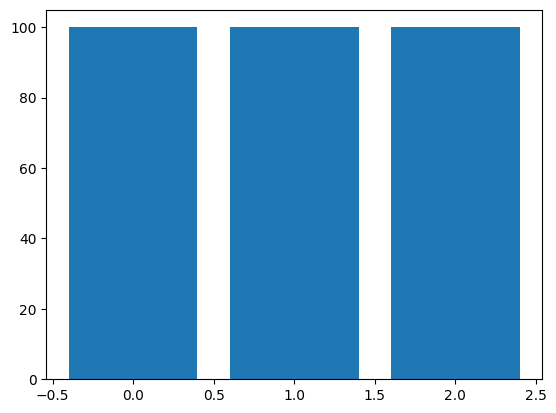

In [314]:
import matplotlib.pyplot as plt

corpus_300_docs = load_files('DataSetEx7/corpus-300docs',encoding='utf-8')

class_dist = pd.Series(corpus_300_docs.target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.show()

In [315]:
count_vectorizer = CountVectorizer(tokenizer=tokenize)
count_matrix = count_vectorizer.fit_transform(corpus_300_docs.data)

word_list = generate_word_list(count_matrix, corpus_300_docs.target, count_vectorizer.get_feature_names_out(), corpus_300_docs.target_names)
display(word_list.sort_values(by='document_occurrences', ascending=False))

,misc.forsale,rec.sport.baseball,rec.sport.hockey,total_occurrences,document_occurrences
edu,839,854,717,2410,300
cantaloup,131,103,100,334,300
cmu,256,173,250,679,300
id,101,100,100,301,300
date,101,102,101,304,300
...,...,...,...,...,...
27990,0,1,0,1,1
rodriguez,0,1,0,1,1
3ce6f700,1,0,0,1,1
rodney,1,0,0,1,1


First, we create a baseline model with all features:

In [316]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

vectorizer_300_docs = TfidfVectorizer(tokenizer=tokenize)
tfidf_matrix_300_docs = vectorizer_300_docs.fit_transform(corpus_300_docs.data)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cross_val_acc = cross_val_score(MultinomialNB(), tfidf_matrix_300_docs.toarray(), corpus_300_docs.target, scoring='accuracy', cv=cv)
print(cross_val_acc.mean())

0.89


Then, we test different pruning approaches:

In [328]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


pipeline = Pipeline([ ('vectorizer', vectorizer_300_docs), ('estimator', MultinomialNB()) ])
parameters = {
    'vectorizer': [CountVectorizer(tokenizer=tokenize, binary=True), CountVectorizer(tokenizer=tokenize), TfidfVectorizer(tokenizer=tokenize)],
    'vectorizer__min_df' : [0, 10, 20],
    'vectorizer__max_df' : [90, 110, 130],
}

nested_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = GridSearchCV(pipeline, parameters, cv=nested_cv, n_jobs=-1)
accuracy = cross_val_score(search, corpus_300_docs.data, corpus_300_docs.target, scoring='accuracy', cv=cv)

print("Optimal cross-validated accuracy: {}".format(accuracy.mean()));

/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be use

Optimal cross-validated accuracy: 0.87


### 7.4. Learn a Classifier for the Job Postings
##### 7.4.1.	The Job Postings corpus contains 500 descriptions of open positions belonging to 30 different job categories. The corpus is provided as an Excel file in ILIAS. Vectorize the corpus  and learn a Naïve Bayes classifier for classifying the job adds. Evaluate the classifying using 10-fold X-Validation. Analyze the classifier performance and the word list. What do you discover? 

In [329]:
import pandas as pd
job_postings = pd.read_excel('DataSetEx7/JobPostings.xls')
job_postings.head()

,Category,JobText
0,customer service,OGPlanet (www.ogplanet.com) is an online game ...
1,customer service,Our company is right now looking for a full-ti...
2,customer service,<br>\nARE YOU READY TO TAKE YOUR CAREER TO THE...
3,customer service,"Due to rapid growth, we currently have several..."
4,customer service,<br>\nOur growing coffee company is looking fo...


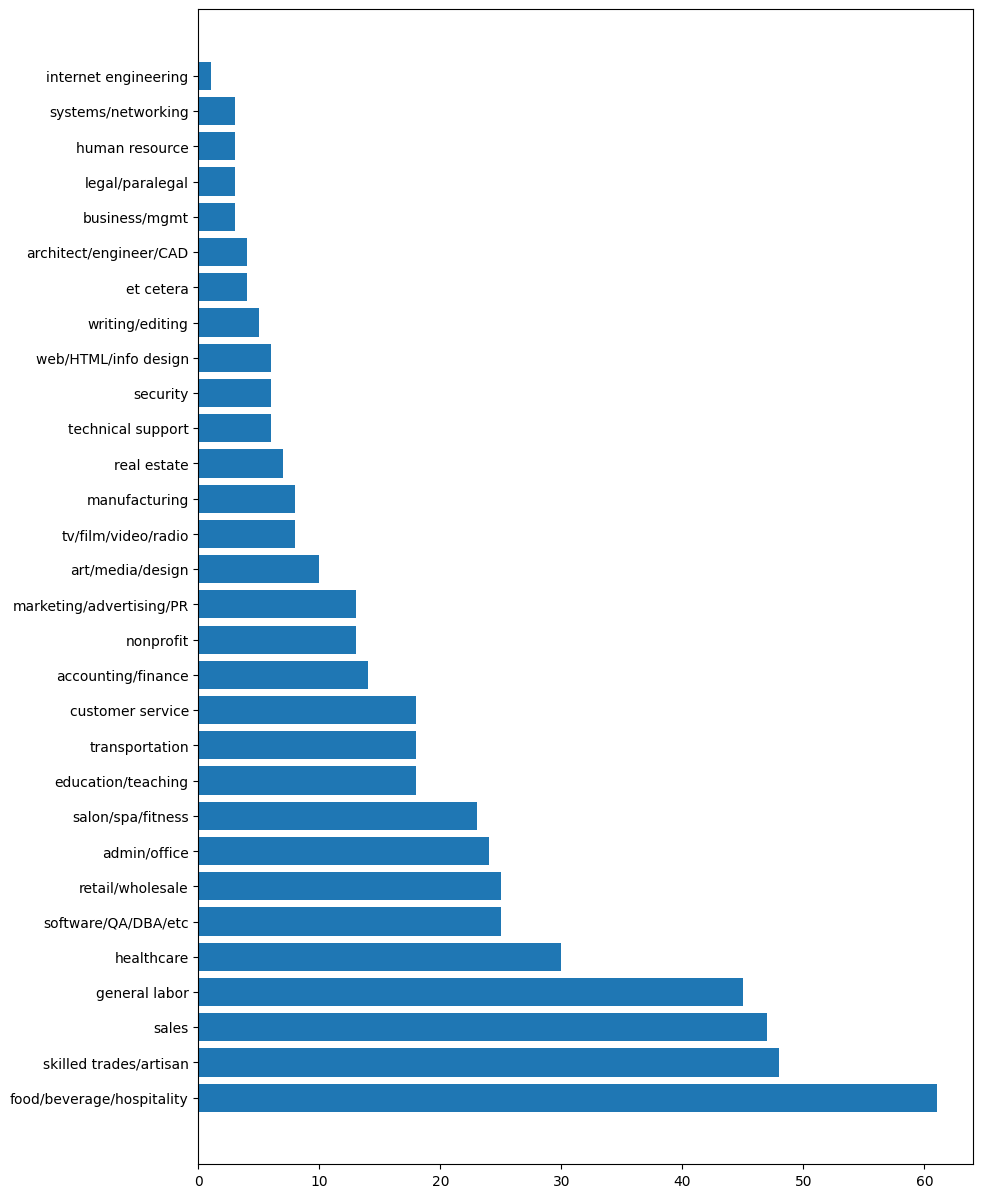

In [330]:
# it is to see the class distribution

import matplotlib.pyplot as plt

job_postings_target = job_postings['Category']
job_postings_data = job_postings['JobText']

class_distribution = pd.Series(job_postings_target).value_counts()

plt.figure(figsize=(10,15))
plt.barh(class_distribution.index, class_distribution)
plt.show()

In [334]:
count_vectorizer = CountVectorizer(tokenizer=tokenize) #tokenize function do the stemming and stopword removal
count_matrix = count_vectorizer.fit_transform(job_postings_data)

word_list = generate_word_list(count_matrix, job_postings_target, count_vectorizer.get_feature_names_out(), job_postings_target.unique())
display(word_list)

,customer service,food/beverage/hospitality,healthcare,general labor,marketing/advertising/PR,art/media/design,manufacturing,nonprofit,admin/office,retail/wholesale,...,architect/engineer/CAD,legal/paralegal,human resource,systems/networking,security,internet engineering,web/HTML/info design,writing/editing,total_occurrences,document_occurrences
br,251,379,79,193,17,324,285,39,590,555,...,415,516,66,107,136,69,148,46,7162,432
work,22,37,2,26,1,34,22,1,67,75,...,59,46,10,4,13,6,19,5,687,296
experi,18,22,12,17,1,19,19,0,48,43,...,39,83,6,7,15,7,11,4,579,280
pleas,14,17,2,10,1,12,15,3,48,33,...,43,23,4,4,6,3,5,2,396,308
requir,13,26,2,12,1,16,14,2,29,26,...,25,41,6,5,10,8,5,1,356,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lighter,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
lightroom,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
lightsheer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
aborigin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Within the wordlist are some HTML fragments which might be 
good to be filtered. Also the data set has a low number of text descriptions per class which
might not be enough to learn a good classifier.

##### 7.4.2 Experiment with different vector creation and pruning methods as well as different types of classifiers in order to increase the performance. What is highest accuracy that you can reach? Which problem concerning precision and recall does remain?

In [332]:
pipeline = Pipeline([ ('vectorizer', TfidfVectorizer(tokenizer=tokenize)), ('estimator', MultinomialNB()) ])
accuracy = cross_val_score(pipeline, job_postings_data, job_postings_target, cv=cv, n_jobs=-1)
print("Baseline cross-validated accuracy: {}".format(accuracy.mean()));

/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Baseline cross-validated accuracy: 0.2644830820287137


In [341]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([ ('vectorizer', None), ('estimator', None) ])
params = {
    'vectorizer': [CountVectorizer(tokenizer=tokenize, binary=True), CountVectorizer(tokenizer=tokenize), TfidfVectorizer(tokenizer=tokenize)], #tokenize = stopwords & stemming
    'vectorizer__min_df': [1, 10],
    'vectorizer__max_df': [0.5, 0.8, 1.0],
    'estimator': [MultinomialNB(), DecisionTreeClassifier()]
}

search = GridSearchCV(pipeline, params, cv=nested_cv, scoring='accuracy')
search.fit(job_postings_data, job_postings_target)

accuracy = cross_val_score(search, job_postings_data, job_postings_target, cv=cv, n_jobs=-1)
print("Optimal cross-validated accuracy: {}".format(accuracy.mean()))

/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will n

Optimal cross-validated accuracy: 0.4608012889882885


In [342]:
print(search.best_params_)

{'estimator': MultinomialNB(), 'vectorizer': CountVectorizer(tokenizer=<function tokenize at 0x28894a820>), 'vectorizer__max_df': 1.0, 'vectorizer__min_df': 10}
